In [1]:
consumer_key = 'c24Qkp4JgscVhtjs5auIN3fmL'
consumer_secret = '0m3YsVl8CWl8VHKC9ziVpblGciO75yuDtRTIdKw0JQ0U3CUHjg'
access_token = '498415333-eEg53jneuhGY0R01zLlbrk1No6MtOcGw9uihfVH0'
access_token_secret = 'MMD3Uz8krIYnpzB268jCbufuTMfsnwVLA1K9SjtMYl5Vi'

In [7]:
import pandas as pd
import tweepy as tweepy
import string
import nltk
import re
import emoji
import matplotlib.pyplot as plt

from string import punctuation
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
stop_word = stopwords.words('Indonesian')
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [9]:
# add stopwords from sastrawi
stop_factory = StopWordRemoverFactory().get_stop_words()
stop_word.extend(stop_factory)
stop_word.extend(['rektor','ui','yg'])

In [10]:
# api connect
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
def search(query,cnt):
  try:
    # set api search with query and tweets count and set tweet mode to extended
    tweets = tweepy.Cursor(api.search, q=query, tweet_mode = 'extended').items(cnt)

    # get only tweet created at and tweets text
    tweets_list = [[tweet.created_at, tweet.full_text] for tweet in tweets]

    # convert to dataframe
    tweet_df = pd.DataFrame(tweets_list,columns=['created_at','tweet'])

    return tweet_df
  
  except BaseException as e:
    print('Error,',str(e))

In [12]:
twitter_df = search('rektor ui -filter:retweets', 100)

In [13]:
twitter_df.head()

,created_at,tweet
0,2021-07-23 01:18:00,JUAL NETFLIX MURAH\n\nSHARING\n45k/bulan\n125/...
1,2021-07-23 01:17:45,"@dipoalam49 @BEMUI_Official Sebagai alumni UI,..."
2,2021-07-23 01:17:23,Lbh baik mundur dr rektor ui krn secara etika ...
3,2021-07-23 01:15:38,@1nohon9 Justru baiknya dia mundur dari jabata...
4,2021-07-23 01:13:19,@msaid_didu Memang bodoh dan rektor UI mundur ...


In [14]:
twitter_df['tweet'][2]

'Lbh baik mundur dr rektor ui krn secara etika sdh hancur https://t.co/d7ngWTP2Hg'

In [15]:
def preprocessing(data):

  # set to lowercase
  data = data.lower()
  # remove whitespace
  data = data.strip()
  # remove emoji
  data = ''.join(c for c in data if c not in emoji.UNICODE_EMOJI)
  # remove links
  data = re.sub(r"http\S+", "", data)
  # remove hashtag
  data = re.sub(r"#\S+", "", data)
  # remove username
  data = re.sub(r"@\S+", "", data)
  # remove punctuation
  remove_table = str.maketrans("","", punctuation)
  data = [x.translate(remove_table) for x in data]
  data = "".join(data)
  # split data
  data = data.split()
  # remove alpha numeric
  data = [w for w in data if w.isalpha()]
  # remove stop words
  data = [x for x in data if not x in stop_word]

  data = " ".join(data)
  
  # lemmatize tokenized word
  # data = [stemmer.stem(x) for x in data]

  return data

In [16]:
twitter_df['clean_tweet'] =  twitter_df['tweet'].apply(preprocessing)

In [17]:
twitter_df.head()

,created_at,tweet,clean_tweet
0,2021-07-23 01:18:00,JUAL NETFLIX MURAH\n\nSHARING\n45k/bulan\n125/...,jual netflix murah sharing private minat wadm ...
1,2021-07-23 01:17:45,"@dipoalam49 @BEMUI_Official Sebagai alumni UI,...",alumni izin bang da dg diganti
2,2021-07-23 01:17:23,Lbh baik mundur dr rektor ui krn secara etika ...,lbh mundur dr krn etika sdh hancur
3,2021-07-23 01:15:38,@1nohon9 Justru baiknya dia mundur dari jabata...,baiknya mundur jabatan gaji rangkap sdh statut...
4,2021-07-23 01:13:19,@msaid_didu Memang bodoh dan rektor UI mundur ...,bodoh mundur kom bri itupun krn bermasalah ter...


In [29]:
twitter_df['tweet'][89]

'@kangdede66 Silakan nilai sendiri,\n\nOrang ini paling agresif menyerang soal jabatan rangkap Rektor UI.\n\nhttps://t.co/XfQhVW9Ue7'

In [18]:
twitter_df['tweet'][8]

'@ComebackU25 @chaatriex @masTenky @MANNAJAIHASAN @Baragbah_18SH @51527B @LampuPatromax @WongTan_ @_Wahyu_H @IsyahZahara2 @mJilan05 @didintik Rektor UI saja mundur\nMosok yang merubah aturan ngga mundur\n#PakdeMundurSaja \n#PakdeMundurSaja'

In [19]:
twitter_df['clean_tweet'][8]

'mundur mosok merubah aturan ngga mundur'

# Feature Engineering



*   Bag of Words
*   TF-IDF



In [20]:
# using count vectorizer
bow  = CountVectorizer()

In [31]:
X_sentence = bow.fit_transform(twitter_df['clean_tweet'])

In [32]:
X_df = pd.DataFrame(X_sentence.toarray(), columns=bow.get_feature_names())
X_df.head()

,ade,adl,afdhol,agresif,ahmad,aja,akademik,akademikus,akalakalan,akankh,...,wetv,whatsapp,when,wilayah,wisma,wkkwkwkwk,wkwwkwk,ybs,yoonderful,youtube
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
X_df.shape

(10, 78)

In [33]:
# using tf-idf
tfidf = TfidfVectorizer()
tf_sentence = tfidf.fit_transform(twitter_df['clean_tweet'])

In [34]:
tf_df = pd.DataFrame(tf_sentence.toarray(), columns=tfidf.get_feature_names())
tf_df

,ade,adl,afdhol,agresif,ahmad,aja,akademik,akademikus,akalakalan,akankh,...,wetv,whatsapp,when,wilayah,wisma,wkkwkwkwk,wkwwkwk,ybs,yoonderful,youtube
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.165388,0.165388,0.0,0.0,0.0,0.0,0.0,0.000000,0.176639,0.165388
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.326114,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
96,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
97,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
98,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


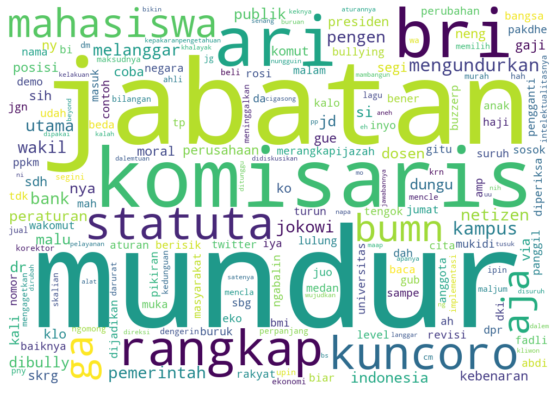

In [247]:
text = " ".join(x for x in twitter_df.clean_tweet)
wordcloud = WordCloud(
    background_color="white", 
    width = 1000,
    height = 700, 
    collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt